In [43]:
import pickle
import umap
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

# Path to the pickle file
# w2v2 xlsr 53 large
filename = "/home/projects/vokquant/accent-recog-slt2022/CommonAccent/results/W2V2/AT/wav2vec2-large-xlsr-53-augmented/8001/save/embeddings/embeddings_Stage.TEST.pkl"
# Initialize an empty list to store all loaded embeddings
loaded_embeddings = []

# Load the data from the pickle file
with open(filename, 'rb') as f:
    try:
        while True:
            # Append the loaded data to the list
            loaded_embeddings.extend(pickle.load(f))
    except EOFError:
        pass  # End of file reached

# # Check loaded data
# for id, embedding in loaded_embeddings:
#     print(f"ID: {id}, Embedding: {embedding.shape}")



# Get the embeddings
embeddings = np.array([embedding for id, embedding in loaded_embeddings])
print(embeddings.shape)
ids = np.array([id for id, embedding in loaded_embeddings])
print(ids.shape)
print("unique ids",np.unique(ids).shape)
labels = np.unique(ids)
print(type(ids))


(5728, 1024)
(5728,)
unique ids (16,)
<class 'numpy.ndarray'>


# Encode the target dialect numbers

In [44]:
class_mapping = {
'62390': 0, '70221': 1, '30860': 2, '31035': 3, '50413': 4, '41706': 5, '70709': 6, '80105': 7, '40719': 8, '70334': 9, '70406': 10, '31405': 11, '32210': 12, '70627': 13, '50304': 14, '70706': 15, '31207': 16, '40702': 17, '40423': 18, '40410': 19, '32309': 20, '41411': 21, '10702': 22, '70208': 23, '70734': 24, '50626': 25, '80225': 26, '30501': 27, '70622': 28, '40621': 29, '50621': 30, '62216': 31, '41342': 32, '61032': 33, '30910': 34, '10903': 35, '50617': 36, '31110': 37, '70615': 38, '20622': 39, '20914': 40, '80411': 41, '50612': 42, '50502': 43, '61627': 44, '32324': 45, '70516': 46, '10925': 47, '40806': 48, '80239': 49, '20321': 50, '80227': 51, '70804': 52, '80128': 53, '41804': 54, '31652': 55, '61257': 56, '30719': 57, '60350': 58, '50509': 59, '70402': 60, '20619': 61, '10401': 62, '61628': 63, '70824': 64, '70606': 65, '50206': 66, '61254': 67, '62105': 68, '31916': 69, '50210': 70, '40402': 71, '61115': 72, '70908': 73, '70419': 74, '70366': 75, '61743': 76, '32518': 77, '40914': 78, '31617': 79, '31401': 80, '50212': 81, '80212': 82, '41501': 83, '70326': 84, '40605': 85, '70362': 86, '70217': 87, '62144': 88, '10428': 89, '32519': 90, '10612': 91, '41102': 92, '50618': 93, '32002': 94, '50506': 95, '21002': 96, '62135': 97, '20604': 98, '61251': 99, '50423': 100, '31814': 101, '70825': 102, '31551': 103, '80109': 104, '31204': 105, '61756': 106, '70920': 107, '70504': 108
}

male_female_dict = { 31401: 'M', 30860: 'W', 41102: 'M', 40605: 'W', 62144: 'M', 61032: 'W', 20321: 'M', 21002: 'W', 50304: 'M', 50621: 'W', 70402: 'M', 70419: 'W', 80109: 'M', 80227: 'W', 10702: 'M', 10925: 'W'}

class_mapping = {v: k for k, v in class_mapping.items()}
print(class_mapping)
# Loop through each key-value pair in the class_mapping dictionary
for key, value in class_mapping.items():
    # Convert the value to string to check the first digit
    value_str = str(value)
    # Check the first character of the value to determine the Bundesland
    if value_str[0] == '1':
        class_mapping[key] = f"{value_str} bgld"
    elif value_str[0] == '2':
        class_mapping[key] = f"{value_str} ktn"
    elif value_str[0] == '3':
        class_mapping[key] = f"{value_str} noe"
    elif value_str[0] == '4':
        class_mapping[key] = f"{value_str} ooe"
    elif value_str[0] == '5':
        class_mapping[key] = f"{value_str} sbg"
    elif value_str[0] == '6':
        class_mapping[key] = f"{value_str} stmk"
    elif value_str[0] == '7':
        class_mapping[key] = f"{value_str} t"
    elif value_str[0] == '8':
        class_mapping[key] = f"{value_str} vbg"
    elif value_str[0] == '9':
        class_mapping[key] = f"{value_str} w"
    else:
        print(f"error: Unrecognized first digit '{value_str[0]}' for key '{key}'")

    # Check if the value is in the male_female_dict
    if int(value) in male_female_dict:
        # Append gender information from male_female_dict
        class_mapping[key] = f"{class_mapping[key]} {male_female_dict[int(value)]}"

print(class_mapping)

{0: '62390', 1: '70221', 2: '30860', 3: '31035', 4: '50413', 5: '41706', 6: '70709', 7: '80105', 8: '40719', 9: '70334', 10: '70406', 11: '31405', 12: '32210', 13: '70627', 14: '50304', 15: '70706', 16: '31207', 17: '40702', 18: '40423', 19: '40410', 20: '32309', 21: '41411', 22: '10702', 23: '70208', 24: '70734', 25: '50626', 26: '80225', 27: '30501', 28: '70622', 29: '40621', 30: '50621', 31: '62216', 32: '41342', 33: '61032', 34: '30910', 35: '10903', 36: '50617', 37: '31110', 38: '70615', 39: '20622', 40: '20914', 41: '80411', 42: '50612', 43: '50502', 44: '61627', 45: '32324', 46: '70516', 47: '10925', 48: '40806', 49: '80239', 50: '20321', 51: '80227', 52: '70804', 53: '80128', 54: '41804', 55: '31652', 56: '61257', 57: '30719', 58: '60350', 59: '50509', 60: '70402', 61: '20619', 62: '10401', 63: '61628', 64: '70824', 65: '70606', 66: '50206', 67: '61254', 68: '62105', 69: '31916', 70: '50210', 71: '40402', 72: '61115', 73: '70908', 74: '70419', 75: '70366', 76: '61743', 77: '325

In [45]:
print(class_mapping)
ids = np.array([class_mapping[id] for id in ids])
print(ids)

{0: '62390 stmk', 1: '70221 t', 2: '30860 noe W', 3: '31035 noe', 4: '50413 sbg', 5: '41706 ooe', 6: '70709 t', 7: '80105 vbg', 8: '40719 ooe', 9: '70334 t', 10: '70406 t', 11: '31405 noe', 12: '32210 noe', 13: '70627 t', 14: '50304 sbg M', 15: '70706 t', 16: '31207 noe', 17: '40702 ooe', 18: '40423 ooe', 19: '40410 ooe', 20: '32309 noe', 21: '41411 ooe', 22: '10702 bgld M', 23: '70208 t', 24: '70734 t', 25: '50626 sbg', 26: '80225 vbg', 27: '30501 noe', 28: '70622 t', 29: '40621 ooe', 30: '50621 sbg W', 31: '62216 stmk', 32: '41342 ooe', 33: '61032 stmk W', 34: '30910 noe', 35: '10903 bgld', 36: '50617 sbg', 37: '31110 noe', 38: '70615 t', 39: '20622 ktn', 40: '20914 ktn', 41: '80411 vbg', 42: '50612 sbg', 43: '50502 sbg', 44: '61627 stmk', 45: '32324 noe', 46: '70516 t', 47: '10925 bgld W', 48: '40806 ooe', 49: '80239 vbg', 50: '20321 ktn M', 51: '80227 vbg W', 52: '70804 t', 53: '80128 vbg', 54: '41804 ooe', 55: '31652 noe', 56: '61257 stmk', 57: '30719 noe', 58: '60350 stmk', 59: '

# Get region codes and coordinates

In [46]:
import pandas as pd
csv_file = "/home/projects/vokquant/data/dicla/Reflist-2162-Österreichische-Ortschaften.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file, sep=',', encoding='utf-8')

# Ortschaftskennzahl	Name	Postleitzahl: Postleitzahl	Gemeinde: Gemeindekennzahl	Gemeinde: Name
header = ['Ortschaftskennzahl', 'Name', 'Postleitzahl', 'Gemeindekennzahl', 'Gemeinde']
df.columns = header

# make dictionary of Gemeindekennzahl and Gemeinde
gemeinde_dict = dict(zip(df['Gemeindekennzahl'], df['Gemeinde']))
print(gemeinde_dict)

gemeinde_dict_test_list = [10702, 10925, 20321, 21002, 30860, 31401,
                          40605, 41102, 50304, 50621, 61032, 62144,
                          70402, 70419, 80109, 80227]


gemeinde_dict_test = {k: gemeinde_dict[k] for k in gemeinde_dict_test_list}
print(gemeinde_dict_test)


{90001: 'Wien', 80424: 'Zwischenwasser', 80423: 'Weiler', 80422: 'Viktorsberg', 80421: 'Übersaxen', 80420: 'Sulz', 80419: 'Schnifis', 80418: 'Schlins', 80417: 'Satteins', 80416: 'Röthis', 80415: 'Röns', 80414: 'Rankweil', 80413: 'Meiningen', 80412: 'Mäder', 80411: 'Laterns', 80410: 'Koblach', 80409: 'Klaus', 80408: 'Götzis', 80407: 'Göfis', 80406: 'Fraxern', 80405: 'Frastanz', 80404: 'Feldkirch', 80403: 'Dünserberg', 80402: 'Düns', 80401: 'Altach', 80303: 'Lustenau', 80302: 'Hohenems', 80301: 'Dornbirn', 80240: 'Wolfurt', 80239: 'Warth', 80238: 'Sulzberg', 80237: 'Sibratsgfäll', 80236: 'Schwarzenberg', 80235: 'Schwarzach', 80234: 'Schröcken', 80233: 'Schoppernau', 80232: 'Schnepfau', 80231: 'Riefensberg', 80230: 'Reuthe', 80229: 'Möggers', 80228: 'Mittelberg', 80227: 'Mellau', 80226: 'Lochau', 80225: 'Lingenau', 80224: 'Lauterach', 80223: 'Langenegg', 80222: 'Langen bei Bregenz', 80221: 'Krumbach', 80220: 'Kennelbach', 80219: 'Hohenweiler', 80218: 'Hörbranz', 80217: 'Höchst', 80216: 'H

# Get Austrian map

In [47]:
import geopandas as gpd
import requests
import zipfile
import os
import io
import matplotlib.pyplot as plt
import osmnx as ox

# Step 1: Download the shapefile zip file
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
zip_file_path = "ne_110m_admin_0_countries.zip"

response = requests.get(url)
if response.status_code == 200:
    with open(zip_file_path, 'wb') as f:
        f.write(response.content)

# Step 2: Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("natural_earth_data")
os.remove(zip_file_path)
# Step 3: Load the shapefile using GeoPandas
shapefile_path = "natural_earth_data/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)
# Step 4: Filter for Austria
austria = world[world['NAME'] == 'Austria']

# Plot dialects in map

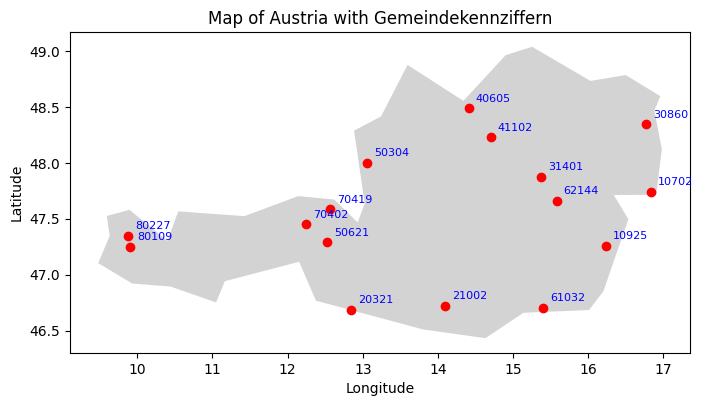

In [48]:
# Step 6: Get coordinates for each place using OSMnx
# add "M" or "W" in gemeinde_dict_test according to the dict male_female_dict
# for k, place in gemeinde_dict_test.items():
#     # print("k")
#     if k in male_female_dict.keys():
#         print(f"key found: {k}")
#         new_place = str(k) + " " + male_female_dict[k]
#         print(f"new place: {new_place}")
#         # update key in dict
        
coordinates = {}
for k, place in gemeinde_dict_test.items():
    location = ox.geocoder.geocode(f"{place}, Austria")
    if location:
        coordinates[k] = location
        # print(f"Coordinates of {place}: {location}")
    else:
        print(f"Location {place} not found")

# Step 7: Plot Austria and mark the locations
fig, ax = plt.subplots(figsize=(8, 8))
austria.plot(ax=ax, color='lightgray')

latitudes = [coord[0] for coord in coordinates.values()]
longitudes = [coord[1] for coord in coordinates.values()]

# Step 8: Mark the Gemeindekennziffern on the map
ax.scatter(longitudes, latitudes, color='red')

# Add annotations for each Gemeindekennziffern
for k, (lat, lon) in zip(coordinates.keys(), coordinates.values()):
    ax.annotate(k, xy=(lon, lat), xytext=(5, 5), textcoords='offset points', fontsize=8, color='blue')

plt.title('Map of Austria with Gemeindekennziffern')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



/home/lorenzg/miniconda3/envs/dicla_torch/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



        UMAP_1     UMAP_2       Dialect    color sex
0     1.750568   7.868240   40605 ooe W   yellow   W
1     3.479125   9.796985   31401 noe M     blue   M
2     5.182248   6.823618   50621 sbg W   purple   W
3     2.796532   9.244318   20321 ktn M    green   M
4     2.037780  10.188969     70402 t M  skyblue   M
...        ...        ...           ...      ...  ..
5723  3.469500  13.085226   80109 vbg M    black   M
5724  1.971453   8.046784   80109 vbg M    black   M
5725  3.490111   5.816217   40605 ooe W   yellow   W
5726 -1.963736  12.031256  10702 bgld M      red   M
5727 -1.982728  12.087060  10702 bgld M      red   M

[5728 rows x 5 columns]


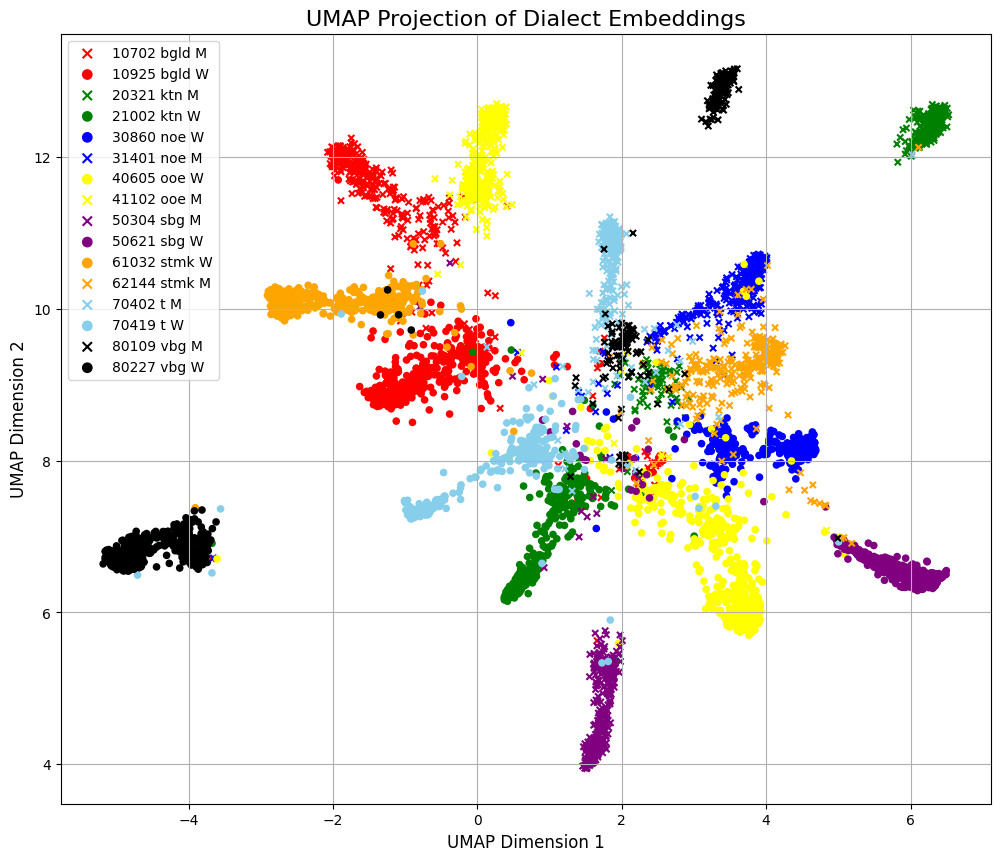

In [50]:
# Reduce the dimensionality of the embeddings
reducer = umap.UMAP(n_neighbors=50, min_dist=0.05, n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

# assign same color to same dialect 
# Define colors for each dialect
df = pd.DataFrame({
    'UMAP_1': embedding_2d[:, 0],
    'UMAP_2': embedding_2d[:, 1],
    'Dialect': ids.astype(str)  # Convert to string to ensure discrete color mapping
})

colors = []
for id in ids:
    if id.split(" ")[1] == "bgld":
        colors.append("red")
    elif id.split(" ")[1] == "ktn":
        colors.append("green")
    elif id.split(" ")[1] == "noe":
        colors.append("blue")
    elif id.split(" ")[1] == "ooe":
        colors.append("yellow")
    elif id.split(" ")[1] == "sbg":
        colors.append("purple")
    elif id.split(" ")[1] == "stmk":
        colors.append("orange")
    elif id.split(" ")[1] == "t":
        colors.append("skyblue")
    elif id.split(" ")[1] == "vbg":
        colors.append("black")
    elif id.split(" ")[1] == "w":
        colors.append("gray")
    else:
        print(f"error: Unrecognized Bundesland '{id.split(' ')[1]}' for id '{id}'")
        colors.append("brown")
df['color'] = colors
color_mapping = {dialect: color for dialect, color in zip(df['Dialect'], df['color'])}

sex = []
for id in ids:
    if id.split(" ")[2] == "M":
        sex.append("M")
    elif id.split(" ")[2] == "W":
        sex.append("W")
    else:
        print(f"error: Unrecognized")
df['sex'] = sex
print(df)
# Plot the embeddings with labels
plt.figure(figsize=(12, 10))

# for i, label in enumerate(np.unique(ids)):
#     idx = ids == label
#     # Get the colors for the specific subset of data points
#     color_subset = df.loc[idx, 'color'].values
#     plt.scatter(
#         embedding_2d[idx, 0], embedding_2d[idx, 1], 
#         label=f"{label}", s=20, 
#         c=color_subset, marker='o', alpha=1.0
#     )
legend_labels = set()

for i, label in enumerate(np.unique(ids)):
    idx = ids == label
    # Get the colors for the specific subset of data points
    color_subset = df.loc[idx, 'color'].values
    sex_subset = df.loc[idx, 'sex'].values
    
    # Plot males with one marker and females with another
    male_idx = (sex_subset == 'M')
    female_idx = (sex_subset == 'W')
    
    if male_idx.any():  # Check if there are any males to plot
        plt.scatter(
            embedding_2d[idx, 0][male_idx], embedding_2d[idx, 1][male_idx],
            s=20, 
            c=color_subset[male_idx], marker='x', alpha=1.0,
            label=f"{label}" if f"{label}" not in legend_labels else None  # Only add if not already added
        )
        legend_labels.add(f"{label}")
    
    # Plot females
    if female_idx.any():  # Check if there are any females to plot
        plt.scatter(
            embedding_2d[idx, 0][female_idx], embedding_2d[idx, 1][female_idx],
            s=20, 
            c=color_subset[female_idx], marker='o', alpha=1.0,
            label=f"{label}" if f"{label}" not in legend_labels else None  # Only add if not already added
        )
        legend_labels.add(f"{label}")
plt.title("UMAP Projection of Dialect Embeddings", fontsize=16)
plt.xlabel("UMAP Dimension 1", fontsize=12)
plt.ylabel("UMAP Dimension 2", fontsize=12)

# Add legend with smaller size
plt.legend(loc='best', fontsize=10, markerscale=1.5)
plt.grid(True)
plt.show()


In [51]:
import plotly.express as px
import pandas as pd

# Convert 'ids' to categorical for distinct color mapping
df = pd.DataFrame({
    'UMAP_1': embedding_2d[:, 0],
    'UMAP_2': embedding_2d[:, 1],
    'Dialect': ids.astype(str)  # Convert to string to ensure discrete color mapping
})


# Create the interactive scatter plot with the color mapping
fig = px.scatter(
    df,
    x='UMAP_1',
    y='UMAP_2',
    color='Dialect',  # Color points by dialect (discrete values)
    title="UMAP Projection of Dialect Embeddings",
    labels={'UMAP_1': 'UMAP Dimension 1', 'UMAP_2': 'UMAP Dimension 2'},
    template='plotly_white',
    category_orders={'Dialect': sorted(df['Dialect'].unique())},  # Ensure consistent ordering of dialects
    color_discrete_map=color_mapping  # Use the color mapping for discrete colors
)

# Customize marker size and transparency
fig.update_traces(marker=dict(size=6, opacity=0.9))
fig.update_layout(legend_title_text='Dialect')

# Start with all traces unchecked
# fig.for_each_trace(lambda trace: trace.update(visible='legendonly'))
# Show the interactive plot
fig.show()


In [12]:
import umap
import plotly.express as px
import pandas as pd

# Reduce to 3D
reducer = umap.UMAP(n_neighbors=50, min_dist=0.05, n_components=3, random_state=42)
embedding_3d = reducer.fit_transform(embeddings)

# Convert 'ids' to categorical for distinct color mapping
df = pd.DataFrame({
    'UMAP_1': embedding_3d[:, 0],
    'UMAP_2': embedding_3d[:, 1],
    'UMAP_3': embedding_3d[:, 2],
    'Dialect': ids.astype(str)  # Convert to string to ensure discrete color mapping
})

# Create the interactive 3D scatter plot with discrete colors for each dialect
fig = px.scatter_3d(
    df,
    x='UMAP_1',
    y='UMAP_2',
    z='UMAP_3',
    color='Dialect',  # Color points by dialect (discrete values)
    title="3D UMAP Projection of Dialect Embeddings",
    labels={'UMAP_1': 'UMAP Dimension 1', 'UMAP_2': 'UMAP Dimension 2', 'UMAP_3': 'UMAP Dimension 3'},
    template='plotly_white',
    category_orders={'Dialect': sorted(df['Dialect'].unique())},  # Ensure consistent ordering of dialects
)

# Customize marker size and transparency
fig.update_traces(marker=dict(size=4, opacity=0.7))
fig.update_layout(legend_title_text='Dialect')

# Start with all traces unchecked
fig.for_each_trace(lambda trace: trace.update(visible='legendonly'))

# Show the interactive plot
fig.show()


/home/lorenzg/miniconda3/envs/dicla_torch/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



# Dialektfamilie

{41501.0: 'Mittelbairisch', 61254.0: 'Süd-/Mittelbairisch', 30501.0: 'Mittelbairisch', 61756.0: 'Süd-/Mittelbairisch', 31401.0: 'Mittelbairisch', 10702.0: 'Süd-/Mittelbairisch', 41102.0: 'Mittelbairisch', 40402.0: '(West-)Mittelbairisch', 70706.0: 'Südbairisch', 40702.0: '(West-)Mittelbairisch', 30910.0: 'Mittelbairisch', 41706.0: 'Mittelbairisch', 50304.0: '(West-)Mittelbairisch', 70804.0: 'Bairisch-Alemannisch', 10401.0: 'Süd-/Mittelbairisch', 80105.0: 'Alemannisch', 70504.0: 'Süd-/Mittelbairisch', 62105.0: 'Süd-/Mittelbairisch', 70402.0: 'Süd-/Mittelbairisch', 41804.0: 'Mittelbairisch', 20604.0: 'Südbairisch', 10903.0: 'Süd-/Mittelbairisch', 61627.0: 'Südbairisch', 80212.0: 'Alemannisch', 10502.0: 'Süd-/Mittelbairisch', 21002.0: 'Südbairisch', 70908.0: 'Südbairisch', 80109.0: 'Alemannisch', 70606.0: 'Bairisch-Alemannisch', 40806.0: '(West-)Mittelbairisch', 61628.0: 'Süd-/Mittelbairisch', 40410.0: '(West-)Mittelbairisch', 31810.0: 'Mittelbairisch', 32002.0: 'Mittelbairisch', 31617.0:

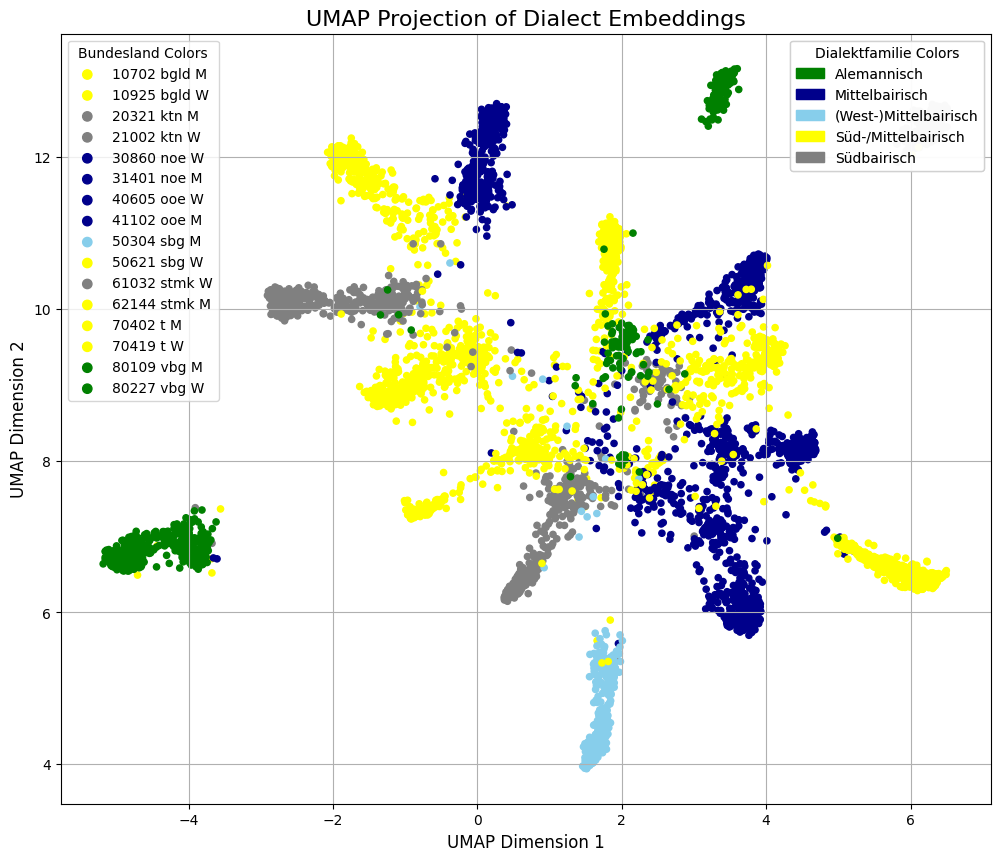

In [32]:
file_path = '/home/projects/vokquant/data/dicla/DiÖ_PP02_Korpus_Dokumentation_final_Dialaketfamilie.xlsx'
df_xlsx = pd.read_excel(file_path)

mapping_family_dict = dict(zip(df_xlsx['Gemeindekennziffer'], df_xlsx['Dialektfamilie']))
# remove nan
city_code_dict = {k: v for k, v in mapping_family_dict.items() if pd.notna(v)}

print(city_code_dict)
# ['(West-)Mittelbairisch' 'Alemannisch' 'Bairisch-Alemannisch'
#  'Mittelbairisch' 'Süd-/Mittelbairisch' 'Südbairisch']
# assign same color to same Dialektfamilie
dialektfamilie_colors = {
    'Alemannisch': 'green',
    # 'Bairisch-Alemannisch': 'red',
    'Mittelbairisch': 'darkblue',
    '(West-)Mittelbairisch': 'skyblue',
    'Süd-/Mittelbairisch': 'yellow',
    'Südbairisch': 'grey',
}

colors = []

for id in ids:
    # assign same color to same Dialektfamilie
    if city_code_dict[int(id.split(" ")[0])] == 'Alemannisch':
        colors.append("green")
    elif city_code_dict[int(id.split(" ")[0])] == 'Bairisch-Alemannisch':
        colors.append("red")
    elif city_code_dict[int(id.split(" ")[0])] == 'Mittelbairisch':
        colors.append("darkblue")
    elif city_code_dict[int(id.split(" ")[0])] == '(West-)Mittelbairisch':
        # bit darker than cyan
        colors.append("skyblue")
    elif city_code_dict[int(id.split(" ")[0])] == 'Süd-/Mittelbairisch':
        colors.append("yellow")
    elif city_code_dict[int(id.split(" ")[0])] == 'Südbairisch':
        colors.append("grey")
    else:
        colors.append("brown")
df['color'] = colors
color_mapping = {dialect: color for dialect, color in zip(df['Dialect'], df['color'])}

# Plot the embeddings with labels
plt.figure(figsize=(12, 10))

for i, label in enumerate(np.unique(ids)):
    idx = ids == label
    # Get the colors for the specific subset of data points
    color_subset = df.loc[idx, 'color'].values
    plt.scatter(
        embedding_2d[idx, 0], embedding_2d[idx, 1], 
        label=f"{label}", s=20, 
        c=color_subset, marker='o', alpha=1.0
    )
plt.title("UMAP Projection of Dialect Embeddings", fontsize=16)
plt.xlabel("UMAP Dimension 1", fontsize=12)
plt.ylabel("UMAP Dimension 2", fontsize=12)
first_legend = plt.legend(loc='best', fontsize=10, markerscale=1.5, title="Bundesland Colors")
plt.gca().add_artist(first_legend)  # Add the first legend to the plot

# add second legend with Dialektfamilie

handles = [
    mpatches.Patch(color=color, label=family)
    for family, color in dialektfamilie_colors.items()
]

# Add the second legend
plt.legend(handles=handles, title="Dialektfamilie Colors", loc='upper right', fontsize=10)

# Ensure both legends are displayed
plt.gca().add_artist(plt.gca().get_legend())  # Re-add the first legend to the plot

plt.grid(True)
plt.show()

